In [235]:
import cupy
import time
import numpy as np
from scipy.io import loadmat
from scipy.interpolate import make_splrep
import matplotlib.pyplot as plt

# Replace with the path to the mat file on your system
inp = loadmat('/home/jchouin/Development/BCI-Signal-Decoding/src/data_and_scripts/data_and_scripts/source_data/raw/MM_S1_raw.mat')

# Apparently Scipy allows us to pull from mat files??? Crazy
# Albeit the notation is horrific
t = inp['cont']['t'][0][0][:,0]
x_pos = inp['cont']['pos'][0][0][:,0]
y_pos = inp['cont']['pos'][0][0][:,1]
x_acl = inp['cont']['acc'][0][0][:,0]

In [233]:
# We can provide knot locations -- est. as the value at which the accel signal changes concavity
der2 = np.diff(x_pos, 2)
t_SP = (((der2[:-1]*der2[1:]) < 0).nonzero())[0]

# Time length in milliseconds
len_t = 25000

# Time Spline fit for reference
start = time.time()
# With est. knots:
#SPL = make_splrep(t[:len_t], x_pos[:len_t], s=0.1, k=4, t=x_pos[t_SP[np.asarray(t_SP) < len_t]].sort())

# With auto-generated knots:
SPL = make_splrep(t[:len_t], x_pos[:len_t], s=0.1, k=4)
end = time.time()
print(end-start)

# Note: Minimal performance difference in SPL generated from provided knots vs. auto-generated knots

1.8599817752838135


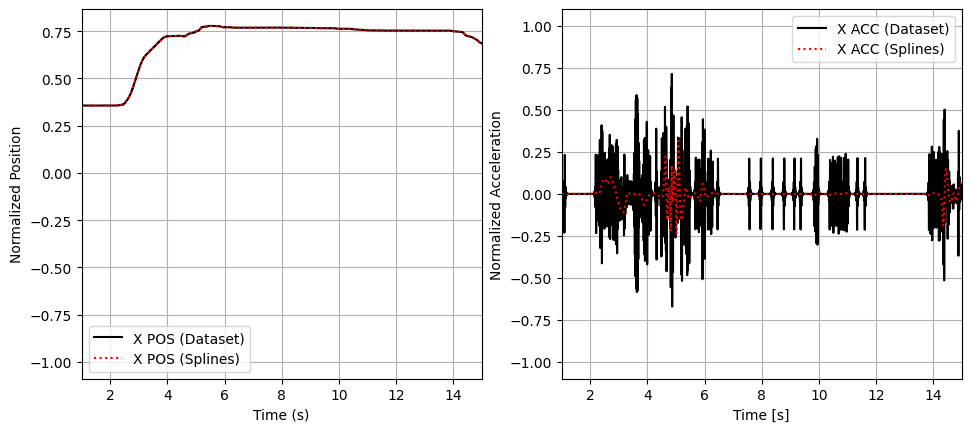

In [238]:
d1 = SPL.derivative(1) # X_Velocity
d2 = d1.derivative(1) # X_Acceleration

# Visualize Position
fig, (pl1, pl2) = plt.subplots(1, 2)
fig.subplots_adjust(right=1.5)
pl1.plot(t[:len_t], x_pos[:len_t]/np.max(np.abs(x_pos[:len_t])), "k", label="X POS (Dataset)")
pl1.plot(t[:len_t], SPL(t[:len_t])/np.max(np.abs(SPL(t[:len_t]))), "r:", label="X POS (Splines)")
pl1.set_xlim((1,15))
pl1.set_xlabel("Time (s)")
pl1.set_ylabel("Normalized Position")
pl1.legend()
pl1.grid()

# Visualize acceleration
pl2.plot(t[:len_t], x_acl[:len_t]/np.max(np.abs(x_acl[:len_t])), "k", label="X ACC (Dataset)")
pl2.plot(t[:len_t], d2(t[:len_t])/np.max(np.abs(d2(t[:len_t]))), "r:", label="X ACC (Splines)")
pl2.set_xlim(1,15)
pl2.set_ylabel("Normalized Acceleration")
pl2.set_xlabel("Time [s]")
pl2.legend()
pl2.grid()